# PyLops - Class-based solvers in v2

This notebook provides a tour of the new class-based solvers in PyLops and how they can be invoked with different level of abstraction (more abstraction <-> less flexibility)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import pylops
from pylops.optimization.solver import cg, CG
from pylops.optimization.solver_old import cg as cg_old

## CG

In [2]:
ny, nx = 100, 50
x = np.ones(nx)
A = np.random.normal(0, 1, (ny, nx))
A = A.T @ A
Aop = pylops.MatrixMult(A)
y = A @ x

In [3]:
def callback(xx, xhist):
    #print(f'Ciao {xx}')
    xhist.append(xx.copy())

In [4]:
# step-by-step solver
cgsolve = CG(Aop, y)

xhist = []
cgsolve.callback = lambda x: callback(x, xhist)

cgsolve.setup(x0=np.zeros(nx), tol=0, show=True)
for i in range(ny):
    cgsolve.step(True if i % 10 == 0 else False)
    cgsolve.callback(cgsolve.x)
cgsolve.finalize(True)
xest = cgsolve.x

CG
-----------------------------------------------------------
The Operator Op has 50 rows and 50 cols
tol = 0.000000e+00
-----------------------------------------------------------
    Itn           x[0]              r2norm
     1         8.6448e-01         2.5851e+02
    11         9.9444e-01         2.9463e+00
    21         1.0001e+00         2.5128e-02
    31         1.0000e+00         1.0814e-04
    41         1.0000e+00         1.1760e-07
    51         1.0000e+00         1.3645e-12
    61         1.0000e+00         3.1486e-22
    71         1.0000e+00         1.2115e-26
    81         1.0000e+00         4.6488e-30
    91         1.0000e+00         2.8368e-33

Iterations = 100        Total time (s) = 0.00
-----------------------------------------------------------------



In [5]:
xhist[0]

array([ 0.86448404,  0.44971521,  0.43224673,  0.65283021,  0.15871278,
        0.39269873,  0.18719562,  0.58464172,  0.89720321,  0.30608556,
        1.35294584,  0.26568408,  1.02768733,  0.77817911,  0.48235999,
        1.18409571,  0.07704118,  0.82318418,  0.19735842,  0.1308321 ,
        0.7031433 ,  0.14425124,  1.08516302,  0.5234738 ,  0.69647084,
        1.54652501,  0.3310417 ,  0.54700357,  0.28322202,  0.21701279,
        0.46548513,  0.00572243,  0.80610557,  0.58444819, -0.0024029 ,
        0.32062444,  1.01407488,  0.44321046,  0.92643699,  0.58665254,
        0.96241429,  1.46671335,  0.62861088,  0.16582578,  0.90452648,
        0.21298671,  0.93395413,  0.45900703,  0.90817546,  0.75094891])

In [6]:
# class based solver
cgsolve = CG(Aop, y)
cgsolve.solve(x0=np.zeros(nx), tol=0, niter=ny, show=True)
xest1 = cgsolve.x

CG
-----------------------------------------------------------
The Operator Op has 50 rows and 50 cols
tol = 0.000000e+00	niter = 100
-----------------------------------------------------------
    Itn           x[0]              r2norm
     1         8.6448e-01         2.5851e+02
     2         1.2246e+00         1.3644e+02
     3         1.1688e+00         8.2208e+01
     4         9.9475e-01         4.7415e+01
     5         9.6173e-01         2.6105e+01
     6         9.4001e-01         1.7156e+01
     7         9.5341e-01         1.2954e+01
     8         9.4931e-01         9.8125e+00
     9         9.6053e-01         5.6905e+00
    10         9.7978e-01         3.9420e+00
    11         9.9444e-01         2.9463e+00
    21         1.0001e+00         2.5128e-02
    31         1.0000e+00         1.0814e-04
    41         1.0000e+00         1.1760e-07
    51         1.0000e+00         1.3645e-12
    61         1.0000e+00         3.1486e-22
    71         1.0000e+00         1.2115e-2

In [7]:
# function based solver
xhist = []
xest2 = cg(Aop, y, np.zeros(nx), niter=ny, tol=0, show=True, 
           callback=lambda x: callback(x, xhist))[0]
xest3 = cg_old(Aop, y, np.zeros(nx), niter=ny, tol=0, show=True)[0]

CG
-----------------------------------------------------------
The Operator Op has 50 rows and 50 cols
tol = 0.000000e+00	niter = 100
-----------------------------------------------------------
    Itn           x[0]              r2norm
     1         8.6448e-01         2.5851e+02
     2         1.2246e+00         1.3644e+02
     3         1.1688e+00         8.2208e+01
     4         9.9475e-01         4.7415e+01
     5         9.6173e-01         2.6105e+01
     6         9.4001e-01         1.7156e+01
     7         9.5341e-01         1.2954e+01
     8         9.4931e-01         9.8125e+00
     9         9.6053e-01         5.6905e+00
    10         9.7978e-01         3.9420e+00
    11         9.9444e-01         2.9463e+00
    21         1.0001e+00         2.5128e-02
    31         1.0000e+00         1.0814e-04
    41         1.0000e+00         1.1760e-07
    51         1.0000e+00         1.3645e-12
    61         1.0000e+00         3.1486e-22
    71         1.0000e+00         1.2115e-2

In [8]:
xhist[0]

array([ 0.86448404,  0.44971521,  0.43224673,  0.65283021,  0.15871278,
        0.39269873,  0.18719562,  0.58464172,  0.89720321,  0.30608556,
        1.35294584,  0.26568408,  1.02768733,  0.77817911,  0.48235999,
        1.18409571,  0.07704118,  0.82318418,  0.19735842,  0.1308321 ,
        0.7031433 ,  0.14425124,  1.08516302,  0.5234738 ,  0.69647084,
        1.54652501,  0.3310417 ,  0.54700357,  0.28322202,  0.21701279,
        0.46548513,  0.00572243,  0.80610557,  0.58444819, -0.0024029 ,
        0.32062444,  1.01407488,  0.44321046,  0.92643699,  0.58665254,
        0.96241429,  1.46671335,  0.62861088,  0.16582578,  0.90452648,
        0.21298671,  0.93395413,  0.45900703,  0.90817546,  0.75094891])

(0.0, 2.0)

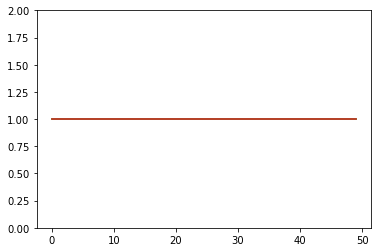

In [9]:
plt.plot(x)
plt.plot(xest)
plt.plot(xest1)
plt.plot(xest2)
plt.ylim(0, 2)

In [10]:
xest-xest1, xest1-xest2, xest1-xest3

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## CG with complex numbers

In [11]:
ny, nx = 100, 50
x = np.ones(nx) + 1j*np.ones(nx)
A = np.random.normal(0, 1, (ny, nx))
A = A.T @ A
Aop = pylops.MatrixMult(A)
y = A @ x

In [12]:
# function based solver
xest2 = cg(Aop, y, np.zeros(nx) + 1j*np.zeros(nx), niter=ny, tol=0, show=True)[0]#, callback=callback)[0]
xest3 = cg_old(Aop, y, np.zeros(nx) + 1j*np.zeros(nx), niter=ny, tol=0, show=True)[0]

CG
-----------------------------------------------------------
The Operator Op has 50 rows and 50 cols
tol = 0.000000e+00	niter = 100
-----------------------------------------------------------
    Itn              x[0]                  r2norm
     1        1.57e-01+1.57e-01j         4.9426e+02
     2        7.37e-01+7.37e-01j         1.8458e+02
     3        7.49e-01+7.49e-01j         1.1481e+02
     4        8.41e-01+8.41e-01j         6.7603e+01
     5        9.66e-01+9.66e-01j         5.3627e+01
     6        9.99e-01+9.99e-01j         3.0965e+01
     7        9.96e-01+9.96e-01j         2.0048e+01
     8        1.00e+00+1.00e+00j         1.4342e+01
     9        9.92e-01+9.92e-01j         7.8393e+00
    10        9.94e-01+9.94e-01j         5.2827e+00
    11        9.93e-01+9.93e-01j         3.8630e+00
    21        1.00e+00+1.00e+00j         2.2932e-02
    31        1.00e+00+1.00e+00j         5.0645e-05
    41        1.00e+00+1.00e+00j         7.5123e-08
    51        1.00e+00+1.00e